# <center><b>Course</b></center>

<div style="text-align:center">
    <img src="../images/seaborn.png" width="600px">
    <div>
       Bertrand Néron, François Laurent, Etienne Kornobis, Vincent Guillemot
       <br />
       <a src=" https://research.pasteur.fr/en/team/bioinformatics-and-biostatistics-hub/">Bioinformatics and Biostatistiqucs HUB</a>
       <br />
       © Institut Pasteur, 2025
    </div>    
</div>

# A glimpse at Seaborn

Seaborn is a Python data visualization library based on **Matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics while still being able to use matplotlib features.

It is organized depending on the type of data you want to represent:

<img src="../images/seaborn_plots.png" width="600px">

You can use the `relplot`, `displot`, `catplot` group functions or directly call the function corresponding to a specific plot.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning, lineno=1498)
warnings.simplefilter(action='ignore', category=UserWarning, lineno=118)


## Simple plot with 2 variables (relplot)

In [3]:
temp = pd.read_csv("../data/fr_sp_it_temp.tsv", sep="\t", header=0, index_col=0)
temp.head()

,City,Year,Tmp,std
0,Barcelona,1995,62.019178,9.569756
1,Barcelona,1996,61.125956,9.420765
2,Barcelona,1997,62.612329,9.827235
3,Barcelona,1998,60.273973,19.750126
4,Barcelona,1999,61.204658,13.904526


In [4]:
paris = temp[temp.City == 'Paris']
paris.head()

,City,Year,Tmp,std
130,Paris,1995,53.742192,20.406326
131,Paris,1996,52.293169,15.207325
132,Paris,1997,55.580000,12.745185
133,Paris,1998,50.317534,27.794295
134,Paris,1999,54.565753,13.990209


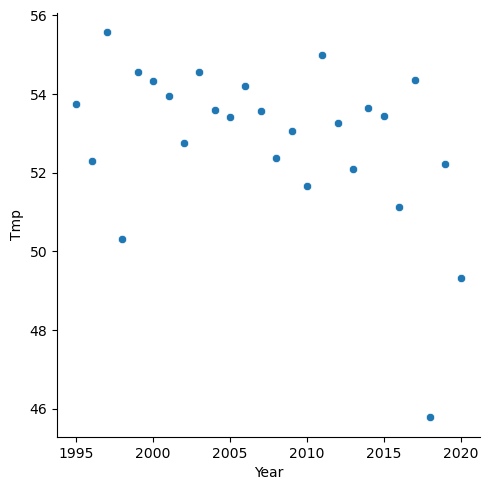

In [5]:
sns.relplot(data=paris, x="Year", y="Tmp")

<Axes: xlabel='Year', ylabel='Tmp'>

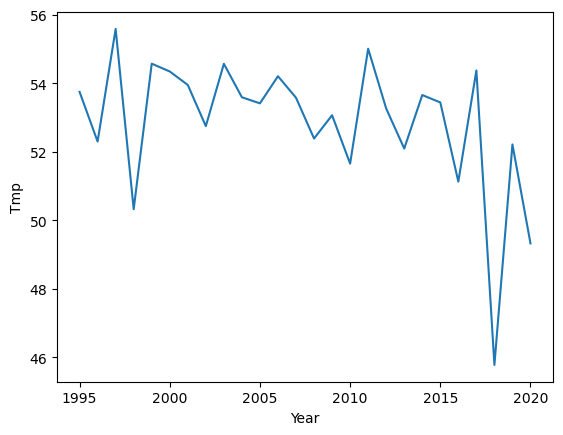

In [6]:
sns.lineplot(data=paris, x="Year", y="Tmp")

<Axes: xlabel='Year', ylabel='Tmp'>

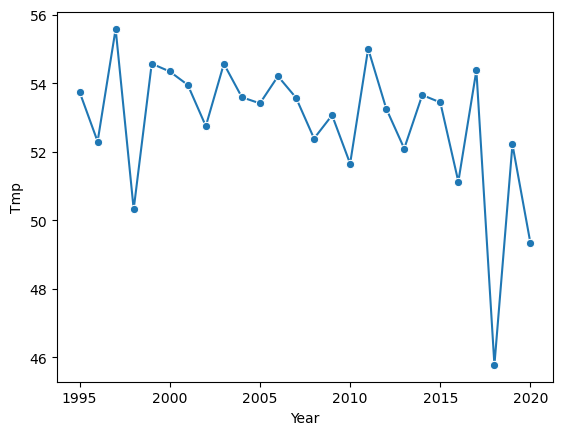

In [7]:
sns.lineplot(data=paris, x="Year", y="Tmp", marker="o")

<Axes: xlabel='Year', ylabel='Tmp'>

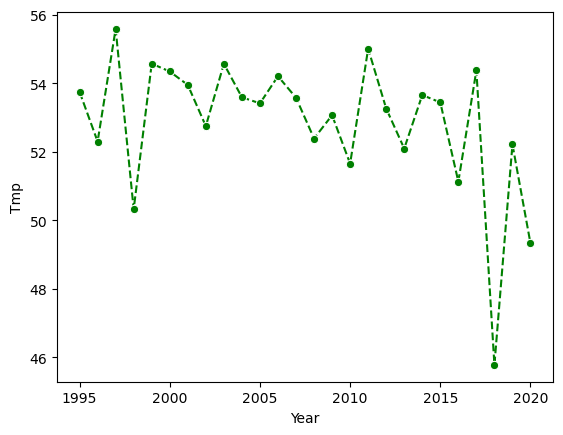

In [8]:
sns.lineplot(data=paris, x="Year", y="Tmp", marker="o", linestyle="--", color="green")

Seaborn is using matplotlib under the hood, so all available linestyles, markers and colors are described in https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

## Several plots

<Axes: xlabel='Year', ylabel='Tmp'>

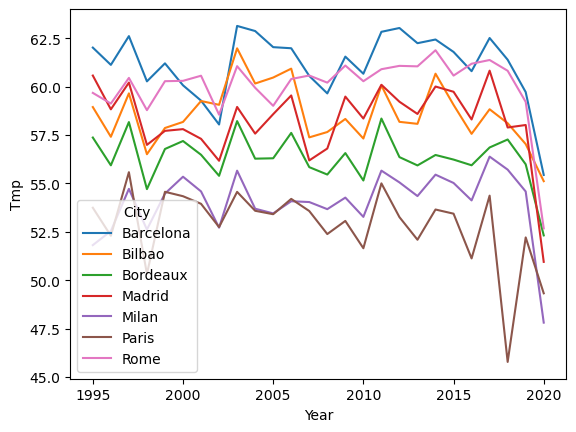

In [9]:
sns.lineplot(data=temp, x="Year", y="Tmp", hue="City")

## Formatting

### Annotations

In order to pretty format our graph, we can use matplotlib.pyplot (here `plt`) functionalities to control the legend, add title and x and y labels: 

Text(0.5, 1.0, 'Average Temperature')

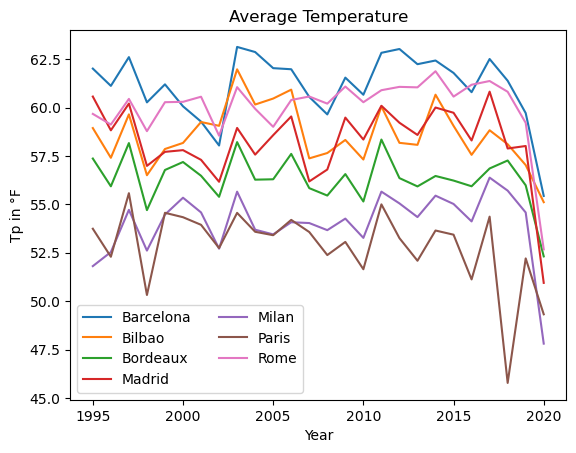

In [10]:
sns.lineplot(data=temp, x="Year", y="Tmp", hue="City")

plt.legend(ncol=2)
plt.xlabel("Year")
plt.ylabel("Tp in °F")
plt.title("Average Temperature")

### xlim, ylim

(50.0, 70.0)

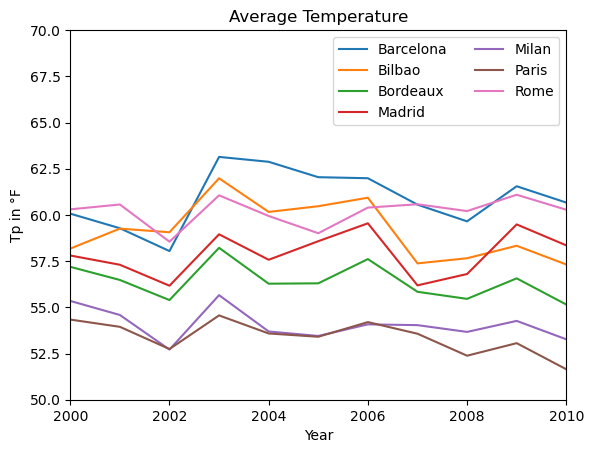

In [11]:
sns.lineplot(data=temp, x="Year", y="Tmp", hue="City")
plt.legend(ncol=2)
plt.xlabel("Year")
plt.ylabel("Tp in °F")
plt.title("Average Temperature")

plt.xlim([2000,2010])
plt.ylim([50,70])

### axvline, axhline

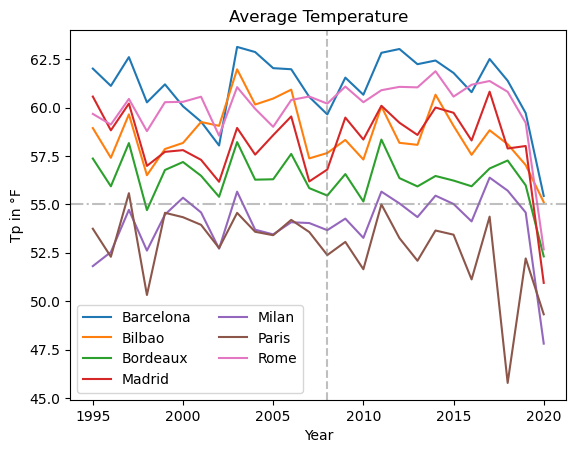

In [12]:
sns.lineplot(data=temp, x="Year", y="Tmp", hue="City")
plt.legend(ncol=2)
plt.xlabel("Year")
plt.ylabel("Tp in °F")
plt.title("Average Temperature")

# Adding horizontal and vertical lines with an alpha parameter
plt.axvline(2008, color="grey", linestyle="--", alpha=0.5)
plt.axhline(55, color="grey", linestyle="-.", alpha=0.5)

## Distribution plots
### Histograms and KDE plots

A histogram is displaying a frequency distribution of a **continuous** dataset using bars.

In [13]:
df = pd.read_csv("../data/titanic.csv")

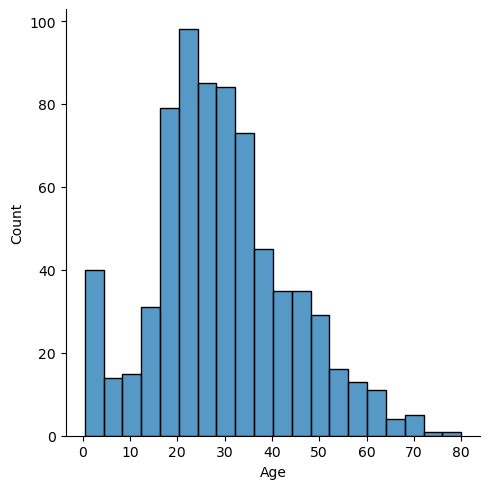

In [14]:
sns.displot(data=df, x="Age")

To overplot different distributions segregated by a categorical variable, you can use the `hue` parameter:

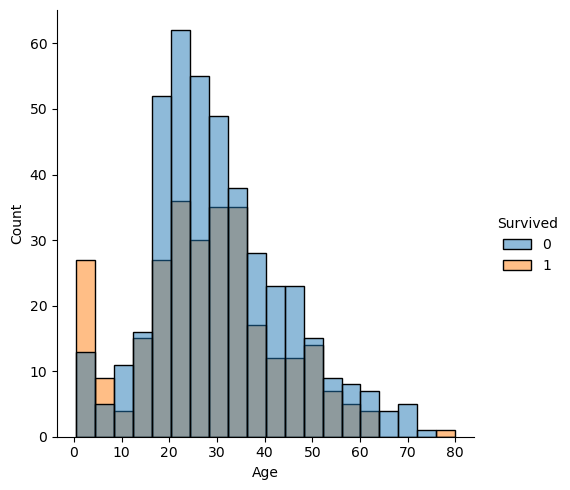

In [15]:
sns.displot(data=df, x="Age", hue="Survived")

#### Influence of bins

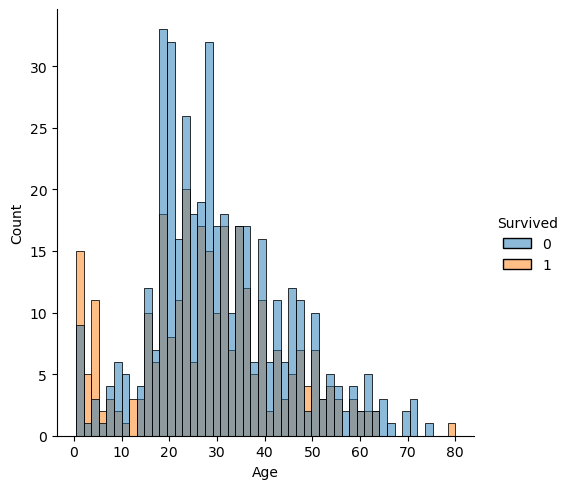

In [16]:
sns.displot(data=df, x="Age", hue="Survived", bins=50)

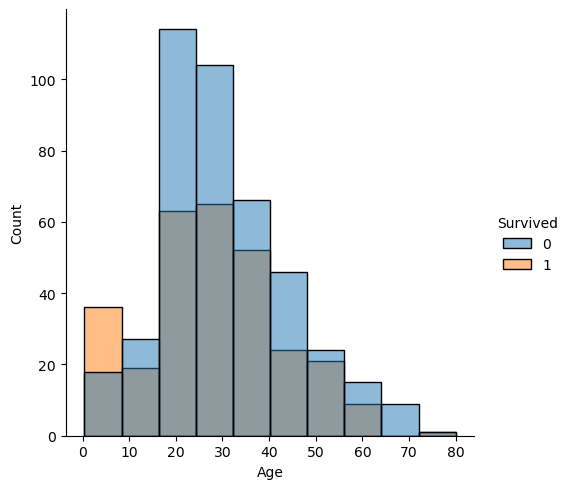

In [17]:
sns.displot(data=df, x="Age", hue="Survived", bins=10)

#### KDE curve

Here is the corresponding continuous probability density curve (kde):

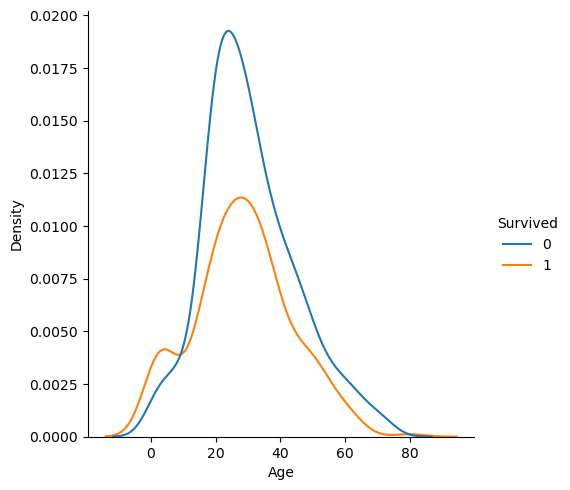

In [18]:
sns.displot(data=df, x="Age", hue="Survived", kind="kde")

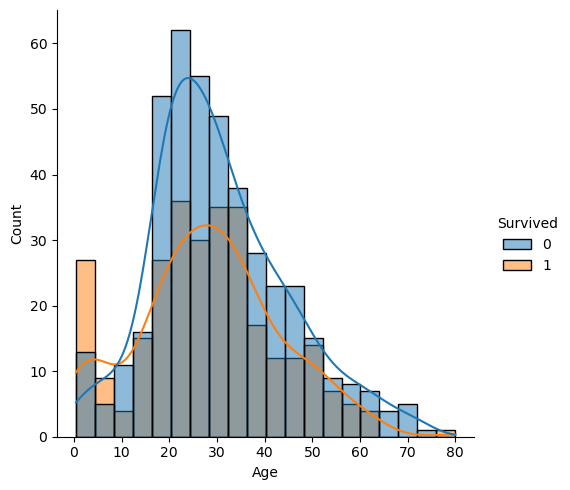

In [19]:
sns.displot(data=df, x="Age", hue="Survived", kde=True)

## Categorical plots
### Barplot

A barplot is a way of displaying for example counts, frequencies or averages for different categories.

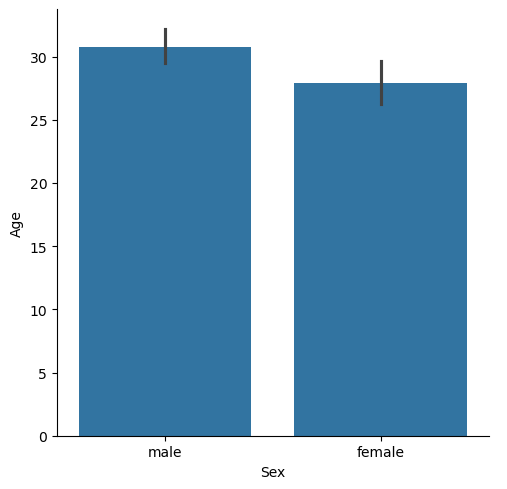

In [20]:
sns.catplot(data=df, x="Sex", y="Age", kind="bar")

### Swarmplot

/home/khourhin/miniforge3/envs/sc_python/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khourhin/miniforge3/envs/sc_python/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khourhin/miniforge3/envs/sc_python/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khourhin/miniforge3/envs/sc_python/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

/home/khourhin/miniforge3/envs/sc_python/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


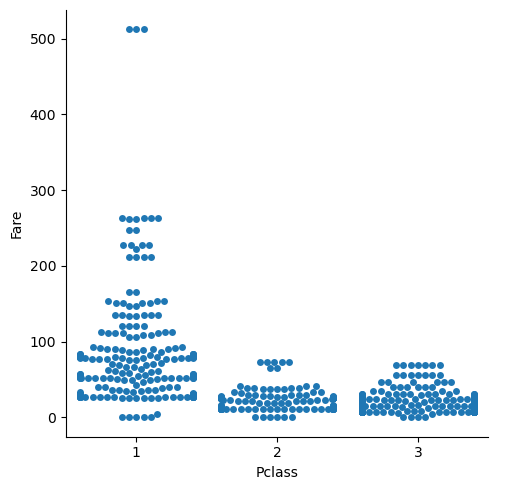

In [21]:
sns.catplot(data=df, x="Pclass", y="Fare", kind="swarm")

### Boxplot

Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.

<div>
 <img src="../images/boxplot_explanation.png" />
</div>

for more explanation visit
https://www.simplypsychology.org/boxplots.html

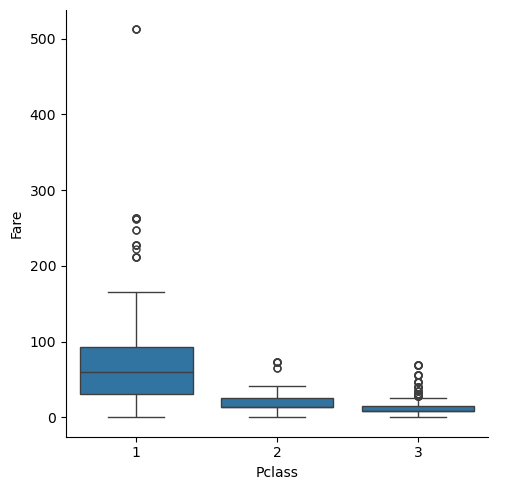

In [22]:
sns.catplot(data=df, x="Pclass", y="Fare", kind="box")

### Violinplot

Sometimes the median and mean aren't enough to understand a dataset. Are most of the values clustered around the median? Or are they clustered around the minimum and the maximum with nothing in the middle? When you have questions like these, distribution plots are your friends.

The box plot is an old standby for visualizing basic distributions. It's convenient for comparing summary statistics (such as range and quartiles), but it doesn't let you see variations in the data. For multimodal distributions (those with multiple peaks) this can be particularly limiting.

But fret not—this is where the violin plot comes in. A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.

formore explanation visit: https://mode.com/blog/violin-plot-examples/

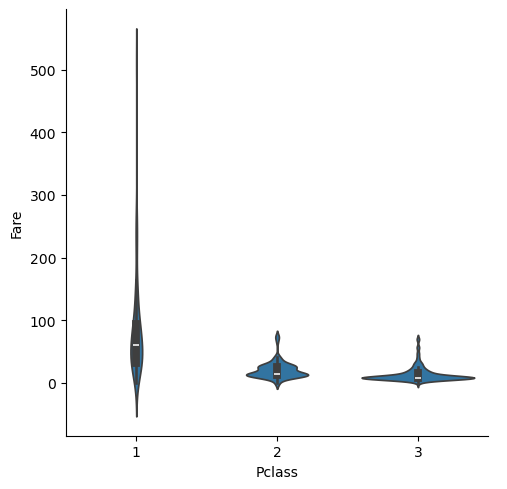

In [23]:
sns.catplot(data=df, x="Pclass", y="Fare", kind="violin")

## Scatterplot

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

https://chartio.com/learn/charts/what-is-a-scatter-plot/

<Axes: xlabel='Age', ylabel='Fare'>

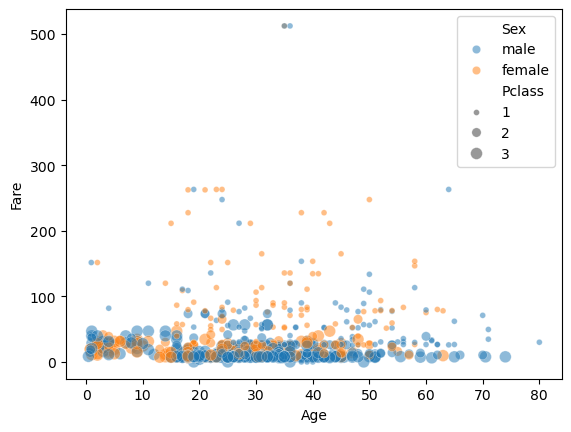

In [24]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex", size="Pclass", alpha=0.5)

## Heatmap

<Axes: >

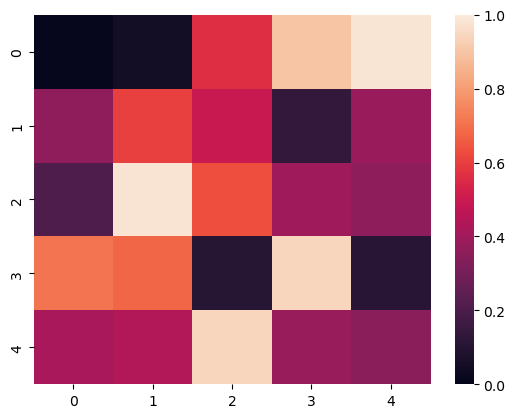

In [25]:
uniform_data = np.random.rand(5, 5)
sns.heatmap(uniform_data, vmin=0, vmax=1)

<Axes: >

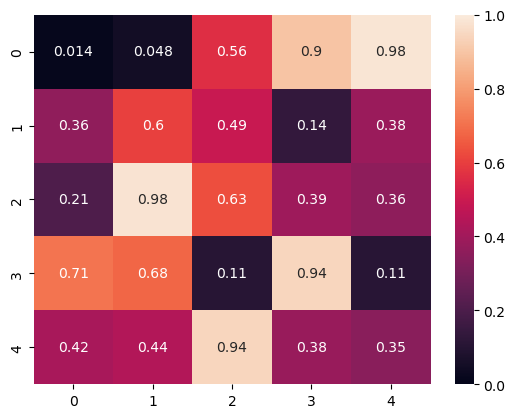

In [26]:
sns.heatmap(uniform_data, vmin=0, vmax=1, annot=True)

## How to make subplots (Matplotlib)

We can pack several plots in a figure.
There is several way to do that, here we describe the *pyplot.subplots* function
> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

When using seaborn plotting function the high level catplot, displot and relplot methods will not work with subplots. You should be specific and use the lower level methods such as histplot, boxplot etc... 

<Axes: xlabel='Age', ylabel='Fare'>

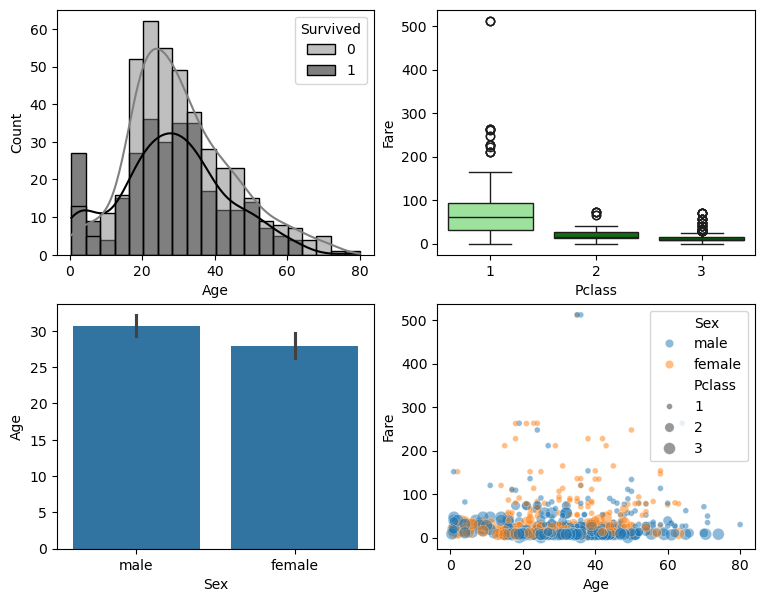

In [37]:
fig, axs = plt.subplots(2,2, figsize=(9,7)) # 2 rows, 2 columns

sns.histplot(data=df, x="Age", hue="Survived", kde=True, ax=axs[0,0], palette=["grey", "black"])
sns.boxplot(data=df, x="Pclass", y="Fare", ax=axs[0,1], hue="Pclass", palette=["lightgreen", "green", "darkgreen"], legend=False)
sns.barplot(data=df, x="Sex", y="Age", ax=axs[1,0])
sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex", size="Pclass", alpha=0.5, ax=axs[1,1])

In [38]:
# More complex visualisations can be incorporated in a function
def titanic_graph():

    fig, axs = plt.subplots(2,2, figsize=(9,7)) # 2 rows, 2 columns

    sns.histplot(data=df, x="Age", hue="Survived", kde=True, ax=axs[0,0], palette=["grey", "black"])
    sns.boxplot(data=df, x="Pclass", y="Fare", ax=axs[0,1], hue="Pclass", palette=["lightgreen", "green", "darkgreen"], legend=False)
    sns.barplot(data=df, x="Sex", y="Age", ax=axs[1,0])
    sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex", size="Pclass", alpha=0.5, ax=axs[1,1])

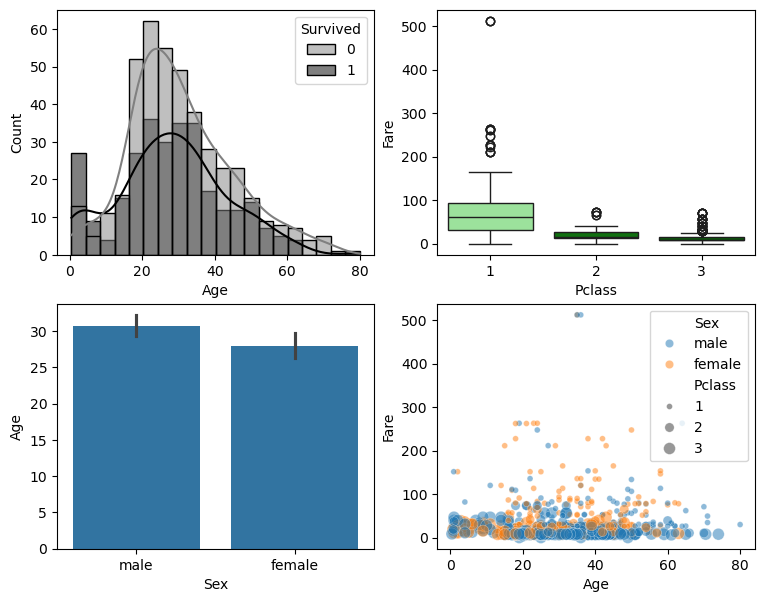

In [39]:
titanic_graph()

## Saving figures (Matplotlib)

In [ ]:
titanic_graph()
plt.savefig("titanic_visualization.pdf")